## Samples and sampling distribution
### Population
Each individual value in the population is the value of a random variable. Thus a population corresponds to a random variable. The density (PDF) and number characteristic of the population is just the PDF and number of characteristic of a random variable $X$. 

### Random samples
In mathematical terms, given a random variable with distribution F, a random sample of length $n$ is a set of $n$ independent, identically distributed (iid) random variables $X_1, X_2, ….X_n$ with distribution F.   By definition, a random sample is already IID, so multiplication rule of PDF applies. The realizations of these samples $x_1, x_2, …x_n$ are not different $n$ features of an observation in machine learning. Instead $x_i$ here indicates a row in a data set. 

### How to obtain random and iid samples
For finite population, sampling with replacement gives the random sample (with iid feature). While sampling with replacement is simple in simulation, it is not convenient in practice. Therefore,  we take a sample as random sample when the sample size $n$ is much smaller than the number of elements in population (10% rule). 

### Examples of random sample
* Within a huge population, a real population of a country, we want to do sampling on the proportion of people voting for a specific candidate. We take a small sample, e.g. 100, as as to satisfy the iid requirement, and obtain a sample proportion of $\hat{p} = 0.55$. Note this is not the unknown population proportion $p$. The sample proportion $\hat{p}$ is a so-called statistics. 

* We are measuring the length of an object. It is impossible to measuring infinite number of times. So we measuring $n$ times to have a sample, and then calculate the mean of these measurements: $\bar{X} = \frac{\sum_{i=1}^n X_i}{n}$. $\bar{X}$, called sample mean, is a statistic on the sample. 

### Sampling distribution
https://en.wikipedia.org/wiki/Sampling_distribution   
In statistics, a sampling distribution or **finite-sample distribution** is the probability distribution of a given **random-sample-based statistic**. If an arbitrarily large number of samples, each involving multiple observations (data points), were separately used in order to compute one value of a statistic (such as, for example, the sample mean or sample variance) for each sample, then the sampling distribution is the probability distribution of the values that the statistic takes on. **In many contexts, only one sample is observed, but the sampling distribution can be found theoretically.**

Sampling distributions are important in statistics because they provide a major simplification en route to statistical inference. More specifically, they allow analytical considerations to be based on the probability distribution of a statistic, rather than on the joint probability distribution of all the individual sample values.

**Further comments** 
* Sampling distribution is a FINITE-sample distribution. Each sample value, e.g. sample mean, is obtained by taking the average of FINITE number of data points. 
* If we use infinite number of data points to obtain a sample statistic, then the sampling distribution of any cases should be normal distribution according to central limit theorem.  
* For the finite-sample distribution (i.e. the sampling distribution we referred to), we thus usually don't have normal distribution. Only in some special cases, the sampling distribution might have a normal distribution. For example, if the corresponding population $X$ is normally distributed, then the sampling distribution of sample mean $\bar{X}$ is Gaussian, as detailed in the example below. If the sample size is very large, we might also approximate its distribution as Gaussian. 
* Because in many cases the sampling distribution is not normal, in interval estimate we usually don't have a symmetric standard error distribution. 
* **Be careful of the term 'sample size' might indicate different things. Sometimes we mean the number of data points to calculate a single statistic, and sometimes we mean the number of statistic calculated.**

### Example 1: Sampling distribution of sample mean in a normal population

#### Distribution of sum of normally distributed and independent random variables 
* If $X_i$ for $i = 1,2, ...n$ are normally distributed and **independent**, then its sum $X_1+X_2+...+X_n$ is still normally distributed with a mean of $\mu_1 + \mu_2+... + \mu_n$ and variance of $\sigma_1^2+\sigma_2^2+...+\sigma_n^2$. This actually can also extend to the linear combination of $X_i$. See proof in standard statistic books. 

* Note that the $n$ here can be small and we don't need the central limit theorem for $\sum_i^n{X_i}$ to satisfy normal distribution.

* Thus, the distribution of a statistic, sample mean $\bar{X}$ is a Gaussian, with the variance 
$$Var(\bar{X}) = Var(\frac{\sum_{i=1}^n X_i}{n}) = \frac{1}{n^2} Var(\sum_{i=1}^n X_i) = \frac{n \sigma^2}{n^2} = \frac{\sigma^2}{n}$$ 

#### Standard deviation (STD) vs standard error (SE)
As stated earlier, a population corresponds to a random variable $X$. Population PDF, population variance, population STD are therefore defined for the random variable $X$. For a sample of size $n$, the population variance, or STD, will **approach constant as $n$ increases**, but not decreases.  
From previous section, we know the STD of the sampling distribution is $ \frac{\sigma}{\sqrt{n}}$. The special STD for sampling distribution is also called standard error (SE). Obviously, SE decreases as $n$ increases, which is different from the population STD. In practice, the population variance $\sigma^2$ is not known, and thus is replaced by the sample variance $\hat{\sigma}^2$. However, be careful that sample variance is not the STD of sampling distribution. It is just the approximate version of population STD. Moreover, it is not that any STDs will approach constant when $n$ approaches infinity. Only population STD (the STD of random variable X), or sample variance, approaches constant when $n$ becomes very large.  

#### From independence to dependence 
The above results about sample mean assume that samples are drawn from an identically, independent distribution (iid). If we drop the independent assumption but consider an averaged correlation $p$ among samples, then we have https://en.wikipedia.org/wiki/Variance, https://en.wikipedia.org/wiki/Covariance
$$ Var(\bar X) = p\sigma^2 + \frac{1-p}{n}\sigma^2$$
Although the variance is now related to correlation, the idea of using more samples to reduce variance is still valid. First, we can make sure the samples from a bootstraping process are as independent as possible. Second the variance is decreasing as the number of samples increases. 

### Example 2 Sampling distribution of sum of sample variance in a normal population
* If $X_i$ for $i = 1,2, ...n$ are normally (**to be specific: $\in N(0,1)$) distributed and independent**, then the sum $X^2 = X_1^2+X_2^2+...+X_n^2$ no longer satisfies the normal distribution. We instead have $X^2 \sim\chi^2(n)$ distribution with $n$ degree of freedom. 

* Check the shape of $\chi^2(n)$ distribution elsewhere. As $n$ increases, the $\chi^2$ will be more like a Gaussian (central limit theorem). This can also be understood this way: If there are only two degrees of freedom, then it is highly unlikely to obtain big $X^2$ values and thus PDF is skewed to the lower $X^2$ value. As the degree of freedom becomes larger and larger, we have the sum of the square of so many normally distributed random variables. This the probabilities to obtain either big or small $X^2$ become equal. 

* $\chi^2$ distribution is strongly related to $\gamma$ distribution. See other notes. 

* Assume $X_1^2 \in \chi^2(n_1)$ and $X_2^2 \in \chi^2(n_2)$ and are independent to each other, then $X_1^2+X_2^2 \in \chi^2(n_1+n_2)$. 

* For $\chi^2(n)$, we have $E(\chi^2(n)) = n$ and $\text{Var}(\chi^2(n)) = 2n$. 

* **As in the sampling distribution of sample mean $\bar{X}$ where the x-axis is just the $\bar{X}$, in the $\chi^2$ distribution, the x-axis is $X^2$ defined earlier. However, it is not divided by number of points to calculate a single statistic.**

### Example 3 $t$-distribution and $F$-distribution
* If $X\in N(0,1)$ and $Y\in \chi^2(n)$ and are independent to each other, then $t = \frac{X}{Y/n}$ satisfies a $t$-distribution $t(n)$. 
* If $U = \chi^2(n_1)$ and $V=\chi^2(n_2)$ and are independent to each other, $F=\frac{U/n_1}{V/n_2}$ satisfy a $F$-distribution $F(n_1, n_2)$ with degree of $(n_1,n_2)$. 

### Example 4 Summary of sampling distribution  
The examples above are about the sampling distributions **that are ALL related to a normal population**. In other words, either $\chi^2$, $t$ or $F$ distribution, all have an underlying normal population.  Otherwise, it is usually hard to 
obtain an analytical form of distribution.  

Now assuming $X_1, X_2,...X_n$ is a sample from population $N(\mu, \sigma^2)$, and $\bar{X}$ is the sample mean and $S^2$ is sample variance, then we have the following:  
* $\bar{X} \sim N(\mu, \frac{\sigma^2}{n})$ or when $\sigma^2$ is not available or not accurate due to small sample size, then $\bar{X} \sim t(\mu, \frac{S^2}{n})$, where $\sigma^2$ is replaced by $S^2$. 

* $\frac{(n-1)S^2}{\sigma^2} \sim \chi^2 (n-1)$, $\bar{X}$ and $S^2$ are independent.

* $\frac{\bar{X}-\mu}{S/\sqrt{n}} \sim t(n-1)$ 

* $\frac{S_1^2/S_2^2}{\sigma_1^2/\sigma_2^2} \sim F(n_1-1, n_2-1)$  

The different forms here arise from the following fact: (1) First we no longer assume the $N(0,1)$ distribution. (2) Second, definition of variance $S^2$ is different from that of $X^2 = X_1^2+X_2^2+...+X_n^2$ in previous sections. 

Finally, we note that for even simpler Bernoulli population, then it is easy to shown that the sampling distribution of sample mean $n\bar{X}$ (multiplied by $n$) follows a binomial distribution. https://en.wikipedia.org/wiki/Sampling_distribution

## Statistics estimation

### Point and interval estimates
An point estimator is a statistic defined on random samples. Maximum likelihood estimation (MLE) is a typical way for point estimation. Normally the population distribution is known but only parameters are unknown. Unlike the sample mean, the estimator using MLE is sometimes not an explicit function of $X_1, X_2…$. Interval estimates are related to estimating standard error of sampling distribution described in previous chapter. 
Two fundamental problems in statistical inference: estimation and hypothesis testing. The way to estimate can be understood as calculating the expectation value of a statistic, usually in forms of calculating maximum likelihood or minimum cost function. Hypothesis testing is just the application of the point and interval estimates. For example, in Z-testing, only when we know the interval, then we can do hypothesis testing with p-value.  

### Confidence Interval
#### Meaning and interpretation
https://en.wikipedia.org/wiki/Confidence_interval  
Various interpretations of a confidence interval can be given (taking the 90% confidence interval as an example): 
* In terms of repeated samples: "Were this procedure to be repeated on numerous samples, the fraction of calculated confidence intervals (which would differ for each sample) that encompass the true population parameter would tend toward 90%."
* In terms of a single sample: "There is a 90% probability that the calculated confidence interval from some **future experiment encompasses** the true value of the population parameter."

#### Misunderstanding 
* A 90% confidence level **does not mean that for a given realized interval there is a 90% probability that the population parameter lies within the interval.**
* According to the strict frequentist interpretation, once an interval is calculated, **this interval either covers the parameter value or it does not; it is no longer a matter of probability.** The 95% probability relates to the reliability of the estimation procedure, not to a specific calculated interval.

#### Confidence Intervals for Unknown Mean, and Known/Unknown Standard Deviation
http://www.stat.yale.edu/Courses/1997-98/101/confint.htm  

* With known standard deviation, the standard deviation is $\frac{\sigma}{n}$. With unknown standard deviation, the $\sigma$ can be replaced by sample variance. The two cases correspond to normal and $t$ distributions respectively. 
* Once $\sigma$ is known or being approximated with sample variance, then we know the sampling distribution. With this distribution, we can easily calculate the confidence level. For example, for a 90% CI, we may find the points around mean that takes 90% of the area of the distribution. 

### Biased and unbiased estimate
In statistics, the bias (or bias function) of an estimator is the difference between this estimator's expected value and the true value of the parameter being estimated. An estimator or decision rule with zero bias is called unbiased. Otherwise the estimator is said to be biased. General MLE estimate of population variance from a sample is biased. However, we can make this unbiased by multiplying a factor. 

### MLE in machine learning
The applications of many machine learning algorithms are essentially doing statistics estimation. Linear regression is a point estimate (we estimate a function point in function space). Interval estimate can also be done with linear regression. The typical parameter estimating approach, MLE, can be used to derive many supervised learning algorithms such as linear or logistic regressions. When combined with Bayes rules, unsupervised learning algorithms such as mixtures of Gaussians/naive Bayes can be derived with MLE. In fact, a two-step iterative approach called expectation maximization is used, although the key is still MLE. See details on these applications of MLE in the notes of machine learning. 

## Hypothesis Testing -- significance testing

### The most fundamental points of Hypothesis test 

* Under the assumption of a **null hypothesis** (such as no effect after applying an medicine), find the probability distribution of a statistic (e.g. mean, mean difference, and anything from aggregation) from analytical or numerical way (permutation, bootstraping). It is because the null hypothesis that we can shuffle or permutate when obtain distribution numerically. For example in a A/B test, we normally should use the control group distribution to calculate the p value. However, when we assume no effect or null hypothesis, we can use the shuffled samples to calculate the 

* Using the distribution of statistic to check whether an observed statistic is due to the effect of some mechanism, or due to measuring volatility. This is done by calculating the p value. 

* If the total probability (p-value) for measuring a statistic value and more extreme ones is very tiny, then the observed value should be due to the effect of some mechanism, e.g. a useful medicine etc. In other words, the observed value is not from measuring volatility. 

* A/B test applies some mechanism on one group and not on the other, then calculate whether the observed statistic value is statistically significant or not. So A/B test is strongly related to hypothesis test.  The distribution from null hypothesis should be the distribution of the group that has not applied any mechanism. That is, null hypothesis corresponds to the control group but not the experimental group, right? 

* Two examples to show the above points:
    * Covid-19 experiment on remdesivir. 
        * Here we consider the death rate of the group without medicine or with placebo is 11% and the group with medicine is 7%. The death rate here is a "sample mean". 
        * Now assumming a null hypothesis, we want to know the distribution of "sample mean" in the no-medicine group. Here we assume a Gaussian distribution as we assume the random variable for calcualting the mean has been affected by many, many factors (central limit theorem). To determine this normal distribution, we need only determine the standard deviation of the sample mean. It is easy to calcualte the STD of the sample. From this STD we can calculate the STD of the sample mean, i.e. SEM. 
        * With sample mean and SEM, we thus have the distribution of relevant statistic under the null hypothesis (related to control group or no-medicine group). With this distribution we can calculate the p value from the observed sample mean from the experimental group, i.e. 7%. If the p value is very tiny, then we regard this treatment is effective, and the effect is not from measuring error. 
        
    * The experiment for evaluating the response time of a type of rat after injecting a medicine. Details can be found in this document and the statistical thinking II. Here only one point is clarified. 
        * In the example, we only know the sample mean in control group is 1.2s but does not know its SEM. However, we know the sample mean in experiment or treatment group is 1.05s and its sample STD is 0.5s. Therefore we also know the standard deviation of the sample mean for the experimental group, which is 0.5/sqrt(N). 
        * We thus have the sample mean and its standard deviation for the experimental group. To me, this should not be the distribution using which we calculate the p value from the observed 1.05s in experimental group. We should use the distribution of sample mean from the control group, or the distribution under null hypothesis. There we only know the sample mean is 1.2 s but don't know the related STD. So what to do next? 
        * In that experiment, we use the STD for the sample mean in experimental group to replace its counterpart in the control group. This way, we have the distribution of the relevant statistic under null hypothesis. 

### Reference

* See statistical thinking II about more examples 

### An intuitive example for hypothesis or significant testing. 
* A neurologist is testing the effect of a drug on response time by injecting $100$ rats with a unit dose of the drug, subjecting each to a neurological stimulus, and recording its response time. The neurologist knows that the mean response time for rats not injected with the drug is $1.2$ seconds. The mean of the $100$ injected rats’ response times is $1.05$ seconds with a sample standard deviation of $0.5$ seconds. Do you think the drug has an effect on response time?  
* Be careful the sample variance is not the standard deviation of the sampling distribution. There is a $\frac{1}{\sqrt{N}}$ difference. Assuming null hypothesis that the drug has no effect, i.e., we assume that the observation of small response time $1.05$s OR LESS is just from measuring volatility. In other words, if we measure a lot of average mean response time we can easily obtain a $1.05$s or less response time even without the drug effect. This is however, just our assumption. If we find that probability to obtain small response time $<= 1.05$ is not that appreciable but very tiny, then we should reject our null hypothesis. 

### The $p$ value.  

* It is the **probability** of **finding the observed, or more extreme**, results **when the null hypothesis of a study question is true** – the definition of 'extreme' depends on how the hypothesis is being tested. Three conditions for the definition of p value are bold.   
* The significance level for a given hypothesis test is a value for which a $p$ value less than or equal to is considered statistically significant. Typical values for are $0.1$, $0.05$, and $0.01$. These values correspond to the probability of observing such an extreme value by chance.

### Hypothesis testing with numerical simulation

* The following is a summary of hypothesis testing with numerical simulations. Specific exercises are in the notes "Statistical Thinking in Python_Part 2". 
* Numerical approach is very flexible in doing hypothesis testing. We can do many types of testing without knowing any information of the closed form probability densities. Moreover, this can be done with almost a standard steps.  

#### General steps of hypothesis testing with numerical approach

* Find a reasonable statistics, which could be the observable, or one of several observables, or function of observables. For example, it could be **mean, mean difference, variance, correlation coefficients, and anything else observed from data. To do testing, we just calculate their replica and do not need know their closed form of sampling distribution, or such a closed-form sampling distribution may not be existed at all.** 

* Once statistics is fixed, we need numerically create many REPLICATES of the predetermined statistics. Depending on specific situation, permutation and bootstrap approaches are often used to generate statistics replicates under the (null) hypothesis. All the generated statistics replicates essentially provide a histogram or PDF for a random variable corresponding to the statistics. With this PDF or histogram we can calculate the $p$ value in order to do the hypothesis testing.

* Calculation of $p$ value. If the observed statistics is less than most of the generated statistics replicates, then we have $p = P(x \leq x_0)$, where $x_0$ is the observed statistic. Otherwise $p = P(x \geq x_0)$. If $p$ is very tiny, then it indicates that observed $x_0$ is not from observing volatility. In other words, this observation is statistically significant, and thus the original null hypothesis should be rejected.

#### Key points in generating statistics replicates
* The statistics replicates are generated under the assumption that (null) hypothesis is true. Only after we clearly state the null hypothesis, we can then generate replicates under this hypothesis. 

* When testing the same distribution of two samples, the better way is to join the two samples and do permutation. It is more accurate than bootstraping. It is not always necessary to join the samples and then perform permutation. If we can assume one same is independent from the other, then permutation on one sample is enough. 

* Bootstraping, though less accurate, is more flexible. When we cannot assume same distributions, but only assume the same other quantities such as means, etc., then it is a better way. 

#### A general A/B testing framework

* A/B testing applies to typical problems such as when we examining the effect of the upgrading of a website. For example, we may examine the whether the spending time of visitors on the website has changed before and after the upgrading. 

* Well known examples: (1) To check the effect of a vaccine or drug on covid-19. Separate into two groups, one group is applied with drup and the other is not. Check some statistics. We normally obtain 

* The key idea to solve this type of problems is: we assume 'there is no effect', 'there is no party affiliation', 'the strike force is with same distribution',.... then we shuffle/permute, or bootstrap to obtain statistics replicates, and then calculate $p$ value to check whether the observed results are statistically significant. We can shuffle because we assume 'no effect', meaning shuffling will not change the general distribution. 

* For some examples we can permute/shuffle. However, in some other examples we cannot. For example, in the example of checking the response time of a type of rat after injecting some medicine, we don't have many samples (we have only one sample statistic, the mean of a sample of certain number of rats), thus we cannot shuffle/permute to obtain a distribution. However, we assume the distribution is normal distribution, and thus we only need know the mean and sample variance. After knowing the mean the SEM (= STD/sqrt(N)), then we know the distribution, and thus we can calculate the p value to check whether the observed result is statistically significant. 

* So when doing either A/B tests or the general hypothesis tests, we can use the following ways to obtain a distribution: (1) Analytical approach. There are many ways in this category. A lot of cases involve the determination of some parameters for the corresponding analytical distribution. (2) Numerical approach. (A) Permutation. (B) Boostraping. See details in statistical thinking II about when to use which way.
 
* Some other examples, though not with a before and after features, can also be solved with the A/B testing approach. For example, when we want to check whether a congress voting results has strong effect of party affiliation, whether the strike forces of two frogs has same distributions... See detail analysis in the note book statistical thinking II. 

* To me, A/B test here is strongly related to hypothesis test. We can use hypothesis test to check whether a certain observation of is statistically significant, or whether something is really having an effect, or the seemingly effect is just from measuring volatility. 

### Hypothesis testing using closed-form sampling distributions

#### Z-testing and t-testing

* If we know the closed form **sampling distribution** of a statistic, we can apply them in hypothesis testing by integration. Because we are handling sampling distribution in hypothesis testing, be careful of the difference of SE and STD mentioned earlier for the case of Gaussian sampling distribution. However, note that not so many statistics follow a normal sampling distribution, including the sample mean. For example, if the population corresponds to a Bernoulli variable, then the sampling distribution of sample mean will be binomial.  

* If a statistic, sample mean, follows a normal distribution, then we usually apply a hypothesis test called z-test, where z is just shifted and normalized sample mean. The z-test is best used for greater than 30 samples (meaning how many data to calculate a single statistic?) because, under the central limit theorem, as the number of samples gets larger, the samples are considered to be approximately normally distributed. **Comments:** Or if the sample size (the number of data to calculate a single statistic) is not large, but the underlying population is normally distributed, then we still can apply z-testing. 

* For small-sized sample where we cannot use sample variance to replace population variance, we can use t-testing where $t$-distribution is used. Because t-testing is for small size and we know that STD of sample mean get smaller as size increases, we know that t-distribution **is just a fatter normal distribution.**

#### $\chi^2$ testing

See details in the notes about feature selection in machine learning. 

#### Test for the variance of a normal population 

— Page 162, Statistics in Plain English, Third Edition, 2010.

### Important statements about hypothesis testing 

* Some of the statements below can be interpreted with the figure below. 
* Equivalent statements: null hypothesis, $H_0$, $y=0$, has an effect, relevant, no illness, negative.
* Equivalent statements: alternative hypothesis, $H_1$, $y=1$, has no effect, with illness, positive. 
* Equivalent statements: type I error, $\alpha$ error, rejecting the correct $y=0$, but wrongly setting $y=1$, false positive;
* Equivalent statements: type II error, $\beta$ error, rejecting the correct $y=1$, but wrongly setting $y=0$, false negative;
* How sample size, effect size affect $p$ value, power, or $\alpha$, $\beta$? 
* Power = $P(\text{reject } H_0 \mid H_1 \text { is true})$; power = $1-\beta$ but not $\beta$; The **smaller the $\beta$, the bigger the power**, the bigger our 'power' or 'ability' to predict a $y=1$ case (e.g. an effect, an illness, a positive case). Or, the more power to reject $y=0$, or to reject $H_0$ hypothesis. We usually do this when very small $\alpha$. From here we know that $\alpha$ and 'power' are sort of in opposite meanings. **We can confidently reject $H_0$ when $\alpha$ is very small or when 'power' is very big.**   

<img src="power.png" style="width:600px;height:400px"/> 
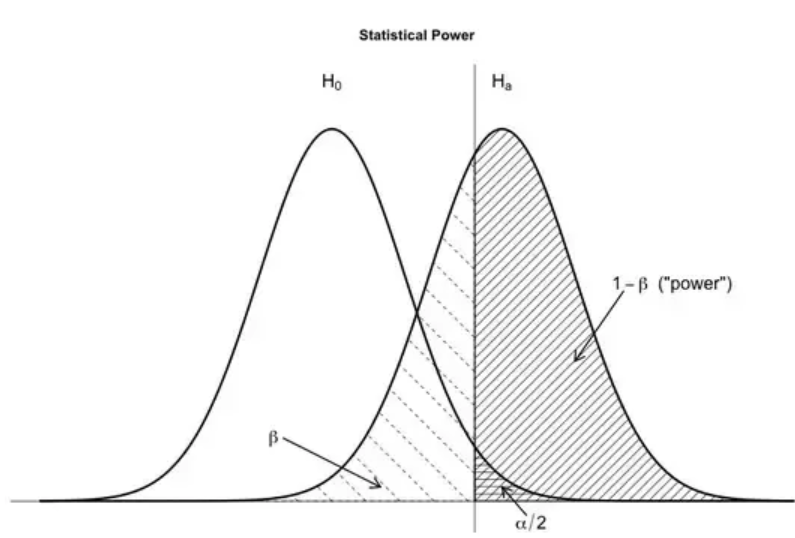

https://www.quora.com/What-is-the-relationship-between-statistical-power-and-the-p-value  
The figure above is also  similar to the graph showing the mechanism of ROC.  

### What is the relationship between statistical power and the p-value? 
The relationship is that given everything else stays the same (sample size, effect size, etc.) then increasing the $\alpha$ value (from 0.05 to 0.1 for example) will give you more power--the vertical line will move to the left. **Comments:** Increasing type I error $\alpha$ will decrease type II error $\beta$, and thus will increase the power $1-\beta$. 

In this picture we have two distributions: the one we expect of the null is true (left) and the one we expect if the alternative hypothesis is true (right). The vertical line is the point where the critical value ($\alpha$) is. We reject the null if our sample has a P-value of less than  $\alpha$ (to the right of the line) and we fail to reject the null if our sample has a p-value greater than $\alpha$ (to the left of the line). 

The "power" is represented as the shaded portion of the right (alternative) distribution. Anything on the right side of this line will cause us to reject the null. **This is our power, the ability to correctly detect an effect if there is one.** If you move the line to the left (by increasing $\alpha$), you have a better chance of correctly rejecting the null given that the true distribution is the alternative one. 

However if the true population distribution is the null one, then moving the line gives you less of a chance of correctly FAILING to reject the null. So there's usually a trade off between power and reducing type 1 errors.

Bonus: Since we've generally as a scientific community accepted that alpha 0.05 is acceptable (this is completely arbitrary by the way), **we control power by increasing our sample size which will make our distributions skinnier and overlap less which means more of our alternative distribution will be on the right of the alpha line.**

<img src="types of errors.png" style="width:600px;height:400px" />

## Relation of surprisal, entropy, cross-entropy,log-likelihood and KL divergence
https://medium.com/@vijendra1125/understanding-entropy-cross-entropy-and-softmax-3b79d9b23c8a

#### Surprisal
Degree to which you are surprised to see the result. Now, if $y_i$ is the probability of $ith$ outcome then we could represent surprisal as: $$s = \text{ log } \frac{1}{y_i} = -\text{ log } y_i$$

#### Entropy:
After knowing the surprisal for individual outcomes, we would like to know surprisal for the event. It would be intuitive to take a weighted average of surprisals. Taking the probability of each outcome as weight makes sense because this is how likely each outcome is supposed to occur. This weighted average of surprisal is nothing but Entropy. If there are $n$ outcomes then it could be written as:
 $$e = \sum_i y_i\text{ log } \frac{1}{y_i}= -\sum_i y_i\text{ log } y_i$$

Here is an example to show that **entry is an impurity error metric or an quantity to show the disorder**. In the classification problem with decision trees, we minimize the entropy in the whole region or its sub-optimal regions. If a sub-region is perfectly classified, then the entropy in that region will be 0. Take binary classification for example, the entropy will be $0\text{log}0+1\text{log}1 = 0$, where $0\text{log}0$ is treated as 0 by convention.

#### Cross-Entropy:
What if each outcome's actual probability is $p_i$ but someone is estimating probability as $q_i$. In this case, each event will occur with the probability of $p_i$ but surprisal will be given by $q_i$ in its formula (since that person will be surprised thinking that probability of the outcome is $q_i$). Now, weighted average surprisal, in this case, is nothing but cross entropy and it could be scribbled as:
$$c = \sum_i p_i\text{ log } \frac{1}{q_i}$$


Check the link below for an animation showing how cross entropy is bigger when $p_i$ is away from $q_i$.  
https://www.desmos.com/calculator/zytm2sf56e

Here is an example to show that why we introduce cross-entropy. Take the binary classification problem using logistic regression, the cross entropy is: 

$$ H(p,q) = \sum_i p_i \text{log}\frac{1}{q_i} = -\sum_i p_i \text{log}q_i = -y\text{log}\hat{y} - (1-y)\text{log}(1-\hat{y})$$ where $p_i$ and $q_i$ are respectively the true labels and predicted labels. We also have $p_{y=1} = y, p_{y=0} = 1-y$ and $q_{y=1} = \hat{y}, q_{y=0} = 1-\hat{y}$.  

We see that the cross entropy provides **a steep penalty for predictions that are both wrong and confident**, i.e., a high probability is assigned to the incorrect class. So to minimize cross-entropy, we can obtain optimized classification result. If we classify perfectly, then cross-entropy will be minimized. 

Now we check the relation of cross-entropy and the commonly used log likelihood. In classification problems we want to estimate the probability of different outcomes. If the estimated probability of outcome $i$ is $q_i$, while the frequency (empirical probability) of outcome $i$ in the training set is $p_i$, and there are $N$ samples, then the likelihood of the training set is $$\Pi_i q_i^{Np_i}$$ 
so the log-likelihood, divided by $N$ is 
$$ \frac{1}{N}\text{ log }\Pi_i q_i^{Np_i} = \sum_i p_i \text{ log }q_i = -H(p,q)$$
so that maximizing the likelihood is the same as minimizing the cross entropy. 


#### Kullback–Leibler (KL) divergence 
* KL divergence (**also called relative entropy**) is a measure of how one probability distribution is different from a second, reference probability distribution. 

* (Wikipedia) For discrete probability distributions $P$ and $Q$ defined on the same probability space, the KL divergence between $P$ and $Q$ is defined to be  
$$
D_{KL}(P||Q) = -\sum_{x\in X} P(x) \text{log}\left(\frac{Q(x)}{P(x)} \right)
$$
Sometimes the sign is changed when numerator and denominator is flipped in the above definition. The KL divergence is defined only if for all $x,Q(x)=0$ implies $P(x) = 0$ (absolute continuity). Whenever $P(x)$ is zero the contribution of the corresponding term is interpreted as zero because
$$
\lim _{x\to 0^{+}}x\log(x)=0
$$

#### Relation between cross-entropy and KL divergence
Comparing the definition of KL divergence and cross-entropy (both in discrete case), which are respectively 
$D_{KL}(P||Q) = -\sum_i P_i \text{log}\frac{Q_i}{P_i} $ and $H(P,Q) = \sum_i p_i\text{ log } \frac{1}{Q_i}$, we can obtain the relation 
$$
H(P,Q) = H(P)+D_{KL}(P||Q)
$$
where $H(P)$ is the entropy of $P$, which is $H(P) = -\sum_i P_i \text{log}P_i$. In classification problems, $H(P)$ is a constant and has no contribution to the gradient for parameter updating. Therefore we have the following conclusion. 

* In the classification problems of machine learning, using either KL divergence or cross-entropy is equivalent. 
* Both of them are a measure of the difference of two distributions. If the two distributions are same, then the KL divergence is zero. 
* There is a constant between them. However, this constant will not contribute to the gradient used for updating parameters.